## Chapter6.4 パラメータチューニング

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

乳がんのデータセットを学習・推論する
<font color="red">**PROJECTID**を書き換えて実行してください</font>

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.svm import SVC

# BigQueryクエリ結果をDataFrameに読み込む
query = 'SELECT * FROM testdataset.wdbc ORDER BY index'
dataset = pd.read_gbq(project_id='PROJECTID', query=query)

# 'M'を0, 'B'を1に変換
dataset['diagnostic'] = dataset['diagnostic'].apply(
    lambda x: 0 if x == 'M' else 1)

# 'index'カラムを削除
dataset.drop('index', axis=1, inplace=True)

# DataFrameからarrayに変換
X_dataset = dataset.drop('diagnostic', axis=1).as_matrix()
y_dataset = dataset.diagnostic.as_matrix()

# 学習用とテスト用にデータセットを分ける
X_train, X_test, y_train, y_test = train_test_split(
    X_dataset, y_dataset, test_size=0.2, random_state=42)


# 最大値が1、最小値が0になるよう各特徴量をスケールする
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# 学習と推論を行う
classifier = SVC()
classifier.fit(X_train, y_train)
classifier.score(X_test, y_test)

Requesting query... ok.
Query running...
Query done.
Cache hit.

Retrieving results...
Got 569 rows.

Total time taken 1.89 s.
Finished at 2017-09-26 22:17:03.


0.94736842105263153

グリッドサーチ

In [3]:
from sklearn.model_selection import GridSearchCV

# グリッドパラメータを定義
params = {'C': [0.1, 1.0, 10.0],
          'gamma': [0.1, 0.5, 1.0]
         }

# 識別器のインスタンスとグリッドパラメータを渡す
gs = GridSearchCV(classifier, params)

# グリッドサーチ実行
gs.fit(X_train, y_train)

# 最も性能のよかったパラメータでテスト
gs.score(X_test, y_test)

0.98245614035087714

グリッドサーチした結果それぞれの正解率を表示

In [4]:
gs.grid_scores_

/Library/Python/2.7/site-packages/sklearn/model_selection/_search.py:662: DeprecationWarning: The grid_scores_ attribute was deprecated in version 0.18 in favor of the more elaborate cv_results_ attribute. The grid_scores_ attribute will not be available from 0.20
  DeprecationWarning)


[mean: 0.88571, std: 0.02019, params: {'C': 0.1, 'gamma': 0.1},
 mean: 0.94725, std: 0.00509, params: {'C': 0.1, 'gamma': 0.5},
 mean: 0.95604, std: 0.00845, params: {'C': 0.1, 'gamma': 1.0},
 mean: 0.95824, std: 0.00325, params: {'C': 1.0, 'gamma': 0.1},
 mean: 0.97582, std: 0.00631, params: {'C': 1.0, 'gamma': 0.5},
 mean: 0.97582, std: 0.01131, params: {'C': 1.0, 'gamma': 1.0},
 mean: 0.97582, std: 0.00631, params: {'C': 10.0, 'gamma': 0.1},
 mean: 0.97582, std: 0.00834, params: {'C': 10.0, 'gamma': 0.5},
 mean: 0.97802, std: 0.00832, params: {'C': 10.0, 'gamma': 1.0}]

最も良かったパラメータ

In [5]:
gs.best_params_

{'C': 10.0, 'gamma': 1.0}

さらに細かくパラメータを探索する

In [6]:
params = {'C': np.arange(5, 50, 5),
          'gamma': np.arange(0.01, 1.0, 0.1)
          }

# 識別器のインスタンスとグリッドパラメータを渡す
gs = GridSearchCV(classifier, params)

# グリッドサーチ実行
gs.fit(X_train, y_train)

# 最も性能のよかったパラメータでテスト
gs.score(X_test, y_test)

0.99122807017543857

結果はDataFrameに変換して表示することもできる

In [7]:
pd.DataFrame(gs.cv_results_).head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_C,param_gamma,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.003755,0.002885,0.951648,0.952742,5,0.01,"{u'C': 5, u'gamma': 0.01}",90,0.954248,0.950331,0.953642,0.950658,0.947020,0.957237,0.000297,0.001371,0.003271,0.003181
1,0.002056,0.001246,0.975824,0.978012,5,0.11,"{u'C': 5, u'gamma': 0.11}",9,0.980392,0.973510,0.966887,0.980263,0.980132,0.980263,0.000332,0.000353,0.006299,0.003184
2,0.001527,0.000816,0.975824,0.981309,5,0.21,"{u'C': 5, u'gamma': 0.21}",9,0.980392,0.976821,0.966887,0.980263,0.980132,0.986842,0.000168,0.000326,0.006299,0.004157
3,0.001287,0.000548,0.975824,0.981309,5,0.31,"{u'C': 5, u'gamma': 0.31}",9,0.980392,0.976821,0.966887,0.980263,0.980132,0.986842,0.000066,0.000024,0.006299,0.004157
4,0.001320,0.000651,0.973626,0.983502,5,0.41,"{u'C': 5, u'gamma': 0.41}",24,0.980392,0.976821,0.960265,0.983553,0.980132,0.990132,0.000063,0.000163,0.009417,0.005434


最も良かったパラメータ

In [8]:
gs.best_params_

{'C': 5, 'gamma': 0.71000000000000008}

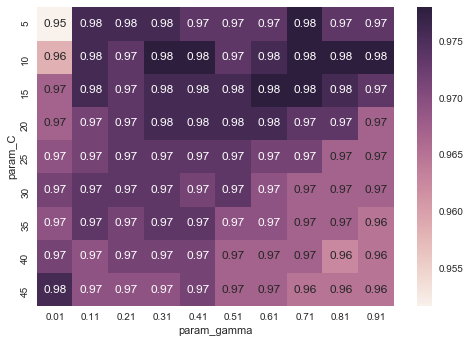

In [9]:
import seaborn as sns

# dictからDataFrameに変換
df = pd.DataFrame(gs.cv_results_)

# ピボットテーブルでCとgammaの値に対するscoreの行列を作る
hm = df.pivot('param_C', 'param_gamma', 'mean_test_score')

# ヒートマップをプロット
sns.heatmap(hm, annot=True)

ランダムサーチ

In [10]:
from sklearn.model_selection import RandomizedSearchCV

params = {'C': np.arange(5, 50, 5),
          'gamma': np.arange(0.01, 1.0, 0.1)
          }

# 識別器のインスタンスとグリッドパラメータを渡す
rs = RandomizedSearchCV(classifier, params, n_iter=10, random_state=42)

# ランダムサーチ実行
rs.fit(X_train, y_train)

# 最も性能のよかったパラメータでテスト
rs.score(X_test, y_test)

0.99122807017543857

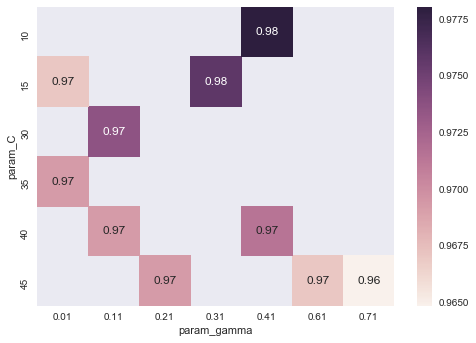

In [11]:
# dictからDataFrameに変換
df = pd.DataFrame(rs.cv_results_)

# ピボットテーブルでCとgammaの値に対するscoreの行列を作る
hm = df.pivot('param_C', 'param_gamma', 'mean_test_score')

# ヒートマップをプロット
sns.heatmap(hm, annot=True)